In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score
import pandas as pd
from sklearn.model_selection import train_test_split

In [29]:
# load the Pima Indians Diabetes dataset
data = pd.read_csv('/content/IRIS.csv')
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [30]:
# separate the features (X) and targets (y)
X = data.drop('species', axis=1).values
y = data['species'].values

In [31]:
# Define PCA function
def pca(X, k=2):
    # Compute the mean of the data along each feature dimension
    mean = np.mean(X, axis=0)
    
    # Center the data
    X_centered = X - mean
    
    # Compute the covariance matrix of the data
    cov = np.cov(X_centered.T)
    
    # Compute the eigenvectors and eigenvalues of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    
    # Sort the eigenvectorsin descending order of their corresponding eigenvalues
    idx = eigenvalues.argsort()[::-1]
    eigenvectors = eigenvectors[:,idx]
    
    # Select the top k eigenvectors to be used as the principal components
    principal_components = eigenvectors[:, :k]
    
    # Transform the data by multiplying it with the selected eigenvectors
    X_pca = np.dot(X_centered, principal_components)
    
    return X_pca


In [32]:
# Apply PCA to the IRIS dataset
X_pca = pca(X)

In [33]:
# Define DBSCAN function
def dbscan(X_pca, eps, min_samples):
    # Initialize labels to -1 (unassigned)
    labels = np.full(X.shape[0], -1)
    
    # Initialize cluster index to 0
    cluster_idx = 0
    
    # Initialize core points, border points, and noise points
    core_points = np.zeros(X.shape[0], dtype=bool)
    border_points = np.zeros(X.shape[0], dtype=bool)
    noise_points = np.zeros(X.shape[0], dtype=bool)
    
    # Initialize dictionary to keep track of cluster sizes
    cluster_sizes = {}
    
    # Iterate over each point
    for i in range(X.shape[0]):
        # If the point has already been assigned to a cluster, skip it
        if labels[i] != -1:
            continue

        # Find all points within eps distance of the current point
        neighbors = []
        for j in range(X.shape[0]):
            if np.linalg.norm(X[j] - X[i]) < eps:
                neighbors.append(j)

        # If the number of neighbors is less than min_samples, assign the point as noise
        if len(neighbors) < min_samples:

            labels[i] = -2
            noise_points[i] = True
            continue

        # Assign the current point to the current cluster and mark it as a core point
        labels[i] = cluster_idx
        core_points[i] = True

        # Add the current point to the cluster size count
        if cluster_idx not in cluster_sizes:
            cluster_sizes[cluster_idx] = 1
        else:
            cluster_sizes[cluster_idx] += 1

        # Expand the cluster by finding all reachable points within eps distance of the current point
        j = 0
        while j < len(neighbors):
            neighbor_idx = neighbors[j]
            
            if labels[neighbor_idx] == -2:
                labels[neighbor_idx] = cluster_idx
                noise_points[neighbor_idx] = True
            
            elif labels[neighbor_idx] == -1:
                labels[neighbor_idx] = cluster_idx
                new_neighbors = []
                for k in range(X.shape[0]):
                    if np.linalg.norm(X[k] - X[neighbor_idx]) < eps:
                        new_neighbors.append(k)
        
                
                if len(new_neighbors) >= min_samples:
                    neighbors += new_neighbors
                    if not core_points[neighbor_idx]:
                        core_points[neighbor_idx] = True
                        border_points[neighbor_idx] = False
                else:
                    border_points[neighbor_idx] = True


                    # Add the new point to the cluster size count
                    cluster_sizes[cluster_idx] += 1

            j += 1
        
        # Increment the cluster index
        cluster_idx += 1
    
    # Print the indices of core points, border points, and noise points
    core_indices = np.where(core_points)[0]
    border_indices = np.where(border_points)[0]
    noise_indices = np.where(noise_points)[0]
    print('Indices of core points:', core_indices)
    print("*************************************************")
    print('Indices of border points:', border_indices)
    print("*************************************************")
    print('Indices of noise points:', noise_indices)
    print("*************************************************")
    n_core_points = np.sum(core_points)
    n_border_points = np.sum(border_points)
    n_noise_points = np.sum(noise_points)
    print("*************************************************")
    print('Number of core points:', n_core_points)
    print('Number of border points:', n_border_points)
    print('Number of noise points:', n_noise_points)
    
    # Print the size of each cluster
    print("*************************************************")
    print("Cluster sizes:")
    for idx, size in cluster_sizes.items():
        print(f"Cluster {idx}: {size} points")
    
    return labels, core_points, border_points, noise_points

In [34]:
# Perform DBSCAN clustering
eps = 0.6
min_samples =4
labels, core_points, border_points, noise_points = dbscan(X_pca , eps, min_samples)

Indices of core points: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  99 100 101 102 103 104 105 107 110 111 112 113 114
 115 116 119 120 121 123 124 125 126 127 128 129 130 132 133 134 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
*************************************************
Indices of border points: [ 15  60  98 108 118 122 135]
*************************************************
Indices of noise points: [ 41 106 109 117 131]
*************************************************
*************************************************
Number of core points: 138
Number of border points: 7
Number of noise points: 5
********************************

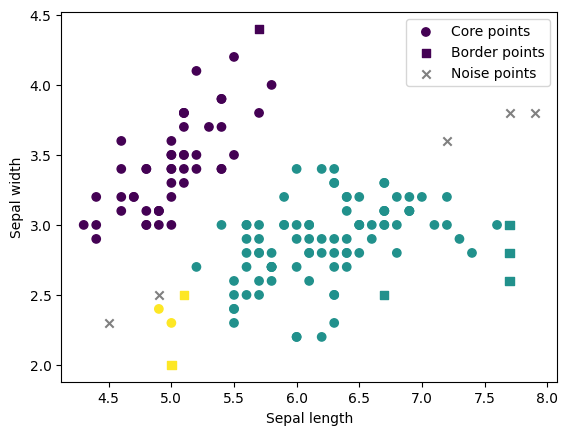

In [35]:
# Plot the results
plt.scatter(X[core_points, 0], X[core_points, 1], c=labels[core_points], marker='o')
plt.scatter(X[border_points, 0], X[border_points, 1], c=labels[border_points], marker='s')
plt.scatter(X[noise_points, 0], X[noise_points, 1], c='gray', marker='x')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(['Core points', 'Border points', 'Noise points'])
plt.show()

In [36]:
# Calculate ARI
Accuracy = adjusted_rand_score(y, labels)

In [13]:
print("Accuracy",Accuracy)

Accuracy 0.7981159420289855
